In [1]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 기사 제목
f = open("D:/GEODATA/bigkinds.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [3]:
# 한나눔 불러오기
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
dataset[:10]

[['구상나무', '산굴뚝나비', '한라산국립공원', '대표', '생물종'],
 ['한라산', '대표', '생물종', '구상나무', '산굴뚝나비', '선정'],
 ['한라산', '대표', '생물', '구상나무산굴뚝나비', '선정'],
 ['한라산', '생태', '특성', '대표', '생물종', '구상나무', '산굴뚝나비', '선정'],
 ['제주', '한라산', '대표', '생물종', '구상나무', '산굴뚝나비'],
 ['한라산국립공원', '대표', '생물'],
 ['장태산', '문재', '코스', '수', '생물친구들'],
 ['강릉제모습', '순포습지', '순채', '복원', '성', '미미'],
 ['쉬다가고파'],
 ['계룡산', '호반새']]

In [5]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
74,"(선정, 깃대종)",0.034951,"[((깃대종), (선정), 0.27692307692307694, 5.70461538...",2
73,"(대전시, 깃대종)",0.020388,"[((깃대종), (대전시), 0.16153846153846155, 4.6217948...",2
77,"(속리산, 담비)",0.020388,"[((담비), (속리산), 0.9130434782608696, 34.83091787...",2
82,"(속리산, 서식)",0.020388,"[((서식), (속리산), 0.5, 19.074074074074073), ((속리산...",2
76,"(담비, 서식)",0.016505,"[((담비), (서식), 0.7391304347826089, 18.126293995...",2
85,"(확인, 서식)",0.016505,"[((서식), (확인), 0.40476190476190477, 16.67619047...",2
87,"(속리산, 하늘다람쥐)",0.013592,"[((속리산), (하늘다람쥐), 0.5185185185185185, 14.43443...",2
72,"(대전, 깃대종)",0.013592,"[((깃대종), (대전), 0.1076923076923077, 2.218461538...",2
71,"(계룡산, 호반새)",0.012621,"[((계룡산), (호반새), 0.619047619047619, 49.04761904...",2
75,"(종, 깃대종)",0.011650,"[((깃대종), (종), 0.09230769230769231, 3.278514588...",2


In [6]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

In [7]:
# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [11]:
# 레이아웃
pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.kamada_kawai_layout(G)

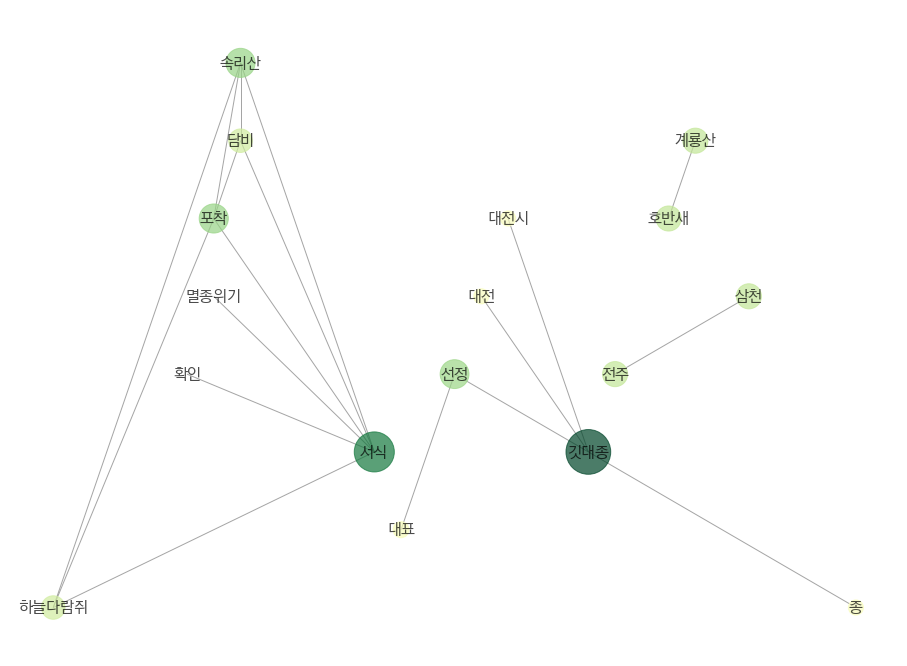

In [9]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

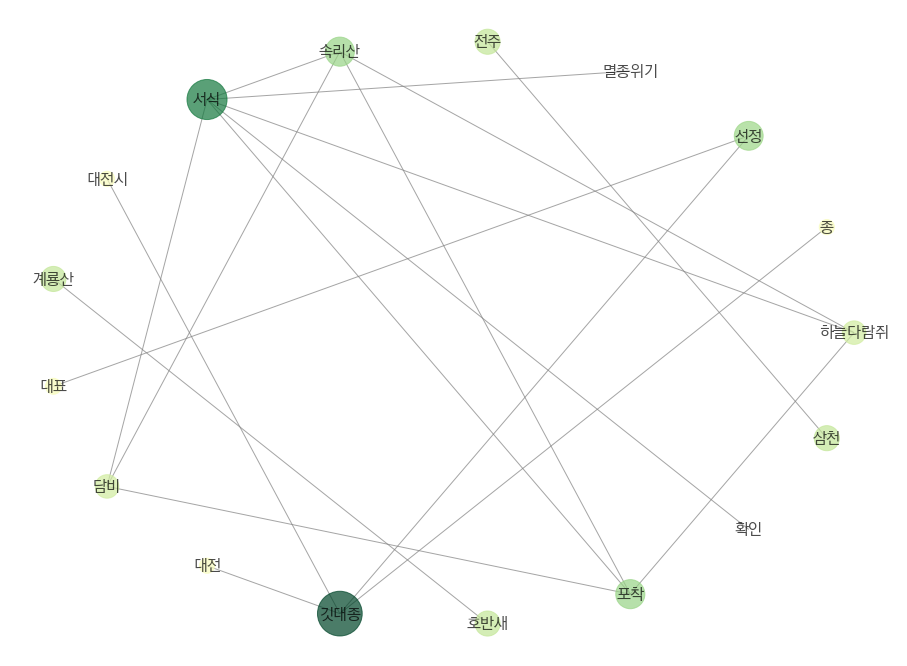

In [10]:
# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.kamada_kawai_layout(G)

# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')